Dimensionality Reduction
### PCA

Principle Component Analysis
- Curse of Dimensionality 
--------------
1. Reduce Dimensions (simpler Model/ Reduce Complexity)
2. Visualize 
3. Reduce Noise 

Application n-dimensional to m-dimensional (m<n)

1 | 2| 3|


PC1 | PC2|

PC1


Maximum Variance

In [0]:
# Eating, exercise habit and their body shape
import pandas as pd
#pd.read_csv('C:\\Desktop\r.csv',sep='~')
#df.to_csv('C:\\desktop\r_new.csv')
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [0]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


__Split feature vectors and labels__

In [0]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [9]:
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [0]:
Y = df[['body_shape']]

In [11]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


Step 1 : __rescaling feature vectors to all have the same scale__

In [0]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [13]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

Step 2: __Covariance Matrix of features__

In [0]:
import numpy as np

In [15]:
# features are columns from x_std
features = x_std.T
features.shape

(5, 10)

In [0]:
import numpy as np
np.cov?

In [18]:
covariance_matrix = np.cov(features)
print(covariance_matrix)


[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [0]:
# Step 3 
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [20]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [21]:
eig_vals[0]

4.065734295237525

In [22]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [23]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
tot=sum(eig_vals)
for i in range(len(eig_vals)):
  print("percentage share of λ",i," - ", (eig_vals[i]/tot)*100)

percentage share of λ 0  -  73.18321731427544
percentage share of λ 1  -  15.097617056715091
percentage share of λ 2  -  1.3733167936950108
percentage share of λ 3  -  4.996542317586193
percentage share of λ 4  -  5.349306517728267


In [0]:
#Order - 0    1    4    3   2
#       PC1  PC2  PC3  PC4  PC5

Step 4: Project data point onto selected Eigen Vector (PC1)

In [0]:
#x_std  PC1.T
#10X5    5*1  = 10X1

In [25]:
projected_X1 = x_std.dot(eig_vecs.T[0])
projected_X1

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [26]:
projected_X2 = x_std.dot(eig_vecs.T[1])
#10,1
projected_X2

array([-0.54936514, -0.23871898,  0.36868681,  0.4544983 , -0.41305057,
       -0.83449111, -1.05380594, -0.3985085 ,  2.09420397,  0.57055116])

In [27]:
print(projected_X1.shape)
print(projected_X2.shape)

(10,)
(10,)


In [0]:
result = pd.DataFrame(projected_X1, columns=['PC1'])
result['PC2'] = projected_X2
result['Y'] = Y

In [0]:
result.head(10)

,PC1,PC2,Y
0,2.226009,-0.549365,Skinny
1,0.018143,-0.238719,Normal
2,-1.762966,0.368687,Fat
3,2.735424,0.454498,Skinny
4,-3.027115,-0.413051,Fat
5,2.147026,-0.834491,Skinny
6,0.371425,-1.053806,Normal
7,-2.592399,-0.398508,Fat
8,0.393478,2.094204,Normal
9,-0.509025,0.570551,Fat


In [0]:
#Step 5 Visualization

Text(0.5, 1.0, 'PCA')

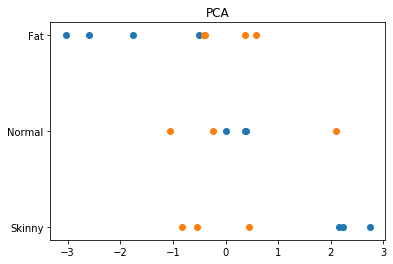

In [0]:
import matplotlib.pyplot as plt
plt.scatter('PC1', 'Y', data=result)
plt.scatter('PC2','Y',data=result)
plt.title("PCA")
